In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import seaborn as sns


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

OnlineSecurity Value Counts:
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64

TechSupport Value Counts:
TechSupport
No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: proportion, dtype: float64

StreamingTV Value Counts:
StreamingTV
No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: proportion, dtype: float64

StreamingMovies Value Counts:
StreamingMovies
No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: proportion, dtype: float64


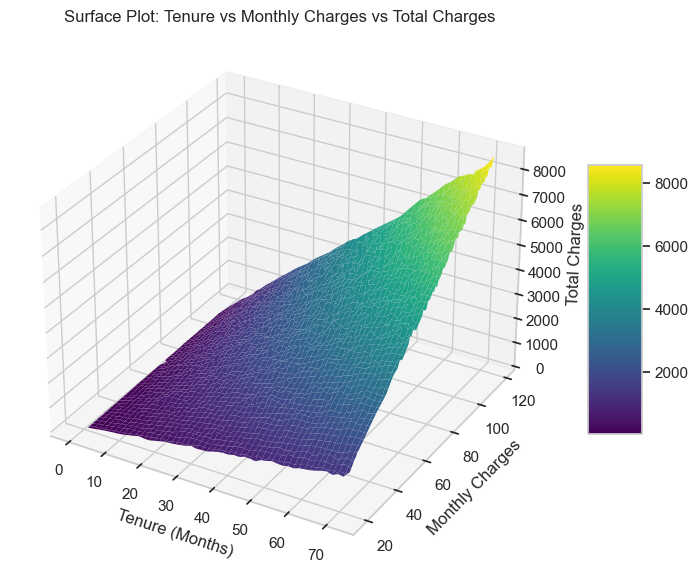

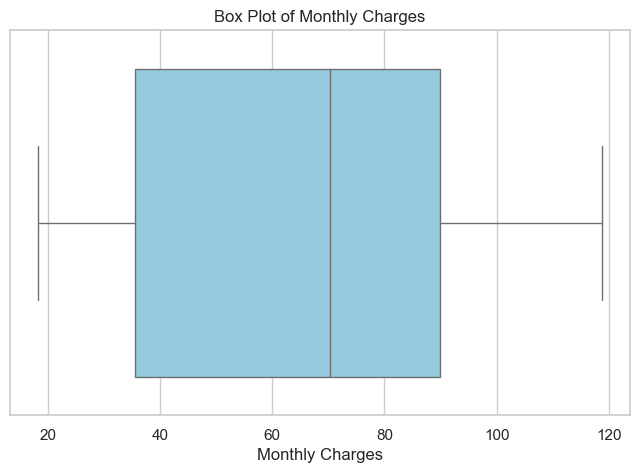

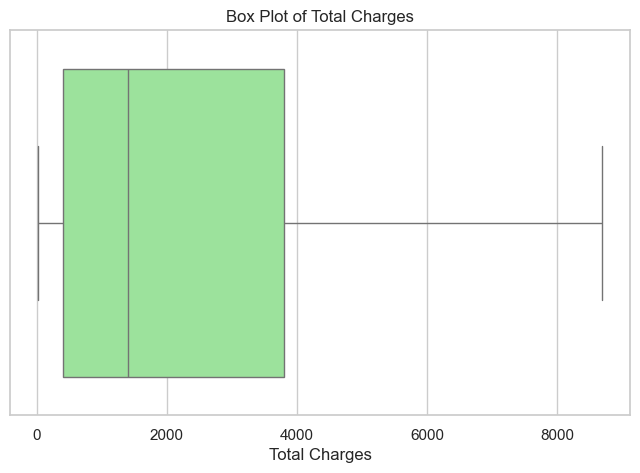

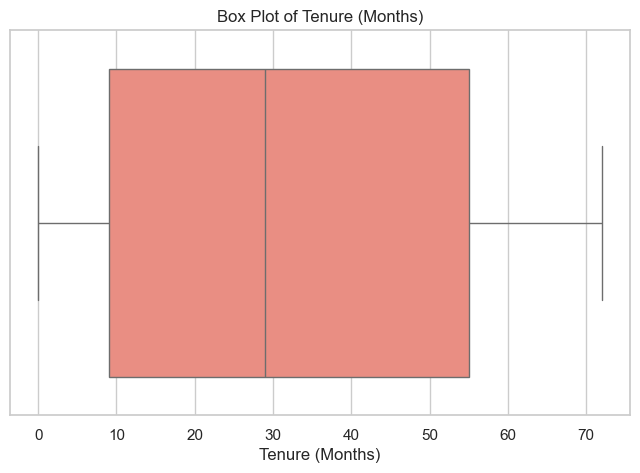

In [63]:
class Telco_Customer_Churn_Data:

    def __init__(self,csv_file):
        self.df = pd.read_csv(csv_file)
        
    def get_data(self):
        return self.df
    def gender_count(self):
        count= self.df['gender'].value_counts()
        return count 
    def SeniorCitizen_count(self):
        count=self.df['SeniorCitizen'].value_counts()
        return count
    def PaymentMethod_data(self):
        return self.df['PaymentMethod'].value_counts()
    def InternetService_data(self):
        return self.df['InternetService'].value_counts()
    def Churn_gender_count(self):
        return self.df.groupby(['Churn','gender']).size()
        def show_info(self):
            
          return self.df.info(),self.df.isnull().sum()
        
    def churn_distribution(self):
        print( self.df['Churn'].value_counts(normalize=True) * 100)
        
    def clean_data(self):
        self.df.drop_duplicates(inplace=True)
        self.df['TotalCharges'] = pd.to_numeric(self.df['TotalCharges'], errors='coerce')
        self.df['TotalCharges'].fillna(self.df['TotalCharges'].median())
        
    def service_usage_stats(self):
        services = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
        for service in services:
            print(f"\n{service} Value Counts:")
            print(self.df[service].value_counts(normalize=True) * 100)   
        
        
    def _load_and_clean_data(self):
        # Load data
        self.df = pd.read_csv(self.filepath)
        
        # Clean data: convert TotalCharges to numeric and drop missing values
        self.df['TotalCharges'] = pd.to_numeric(self.df['TotalCharges'], errors='coerce')
        self.df.dropna(subset=['TotalCharges'], inplace=True)
    
    def plot_surface(self):
        x = self.df['tenure']
        y = self.df['MonthlyCharges']
        z = self.df['TotalCharges']

        # Create grid for surface plot
        xi = np.linspace(x.min(), x.max(), 100)
        yi = np.linspace(y.min(), y.max(), 100)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate z values
        zi = griddata((x, y), z, (xi, yi), method='linear')

        # Plot 3D surface
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

        ax.set_xlabel('Tenure (Months)')
        ax.set_ylabel('Monthly Charges')
        ax.set_zlabel('Total Charges')
        ax.set_title('Surface Plot: Tenure vs Monthly Charges vs Total Charges')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()    
       
    def _load_and_clean_data(self):
        # Load dataset
        self.df = pd.read_csv(self.filepath)

        # Convert TotalCharges to numeric and drop NaNs
        self.df['TotalCharges'] = pd.to_numeric(self.df['TotalCharges'], errors='coerce')
        self.df.dropna(subset=['TotalCharges'], inplace=True)

    def plot_boxplots(self):
        # Set Seaborn style
        sns.set(style="whitegrid")

        # Box plot: MonthlyCharges
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.df['MonthlyCharges'], color='skyblue')
        plt.title('Box Plot of Monthly Charges')
        plt.xlabel('Monthly Charges')
        plt.show()

        # Box plot: TotalCharges
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.df['TotalCharges'], color='lightgreen')
        plt.title('Box Plot of Total Charges')
        plt.xlabel('Total Charges')
        plt.show()

        # Box plot: Tenure
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.df['tenure'], color='salmon')
        plt.title('Box Plot of Tenure (Months)')
        plt.xlabel('Tenure (Months)')
        plt.show()




    

            
        
    



    
t1 = Telco_Customer_Churn_Data('Telco_Customer_Churn_Data (1) (1) (2).csv')
t1.get_data()
t1.gender_count()
t1.SeniorCitizen_count()
t1.PaymentMethod_data()       
t1.InternetService_data() 
t1.Churn_gender_count()
t1.churn_distribution()
t1.clean_data()
t1.service_usage_stats()
t1.plot_surface()
t1.plot_boxplots()

In [11]:
telco_customer = pd.read_csv('Telco_Customer_Churn_Data (1) (1) (2).csv')
telco_customer


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


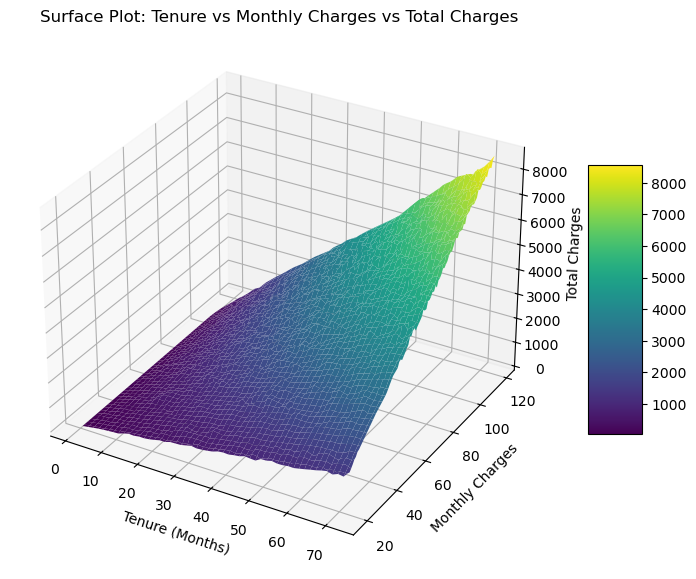

In [65]:
t1 = pd.read_csv("Telco_Customer_Churn_Data (1) (1) (2).csv")
t1['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
t1.dropna(subset=['TotalCharges'], inplace=True)
x = df['tenure']
y = df['MonthlyCharges']
z = df['TotalCharges']

# Create grid values first
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate Z values (surface height)
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total Charges')
ax.set_title('Surface Plot: Tenure vs Monthly Charges vs Total Charges')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [14]:
telco_customer.shape

(7043, 21)

In [27]:
def get_MultipleLines

SyntaxError: expected '(' (2272554449.py, line 1)

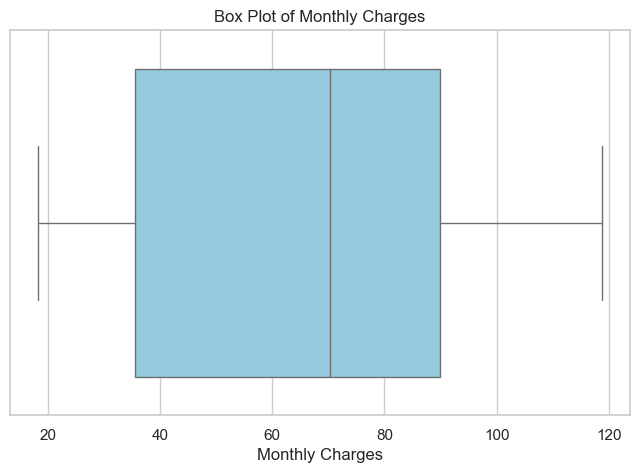

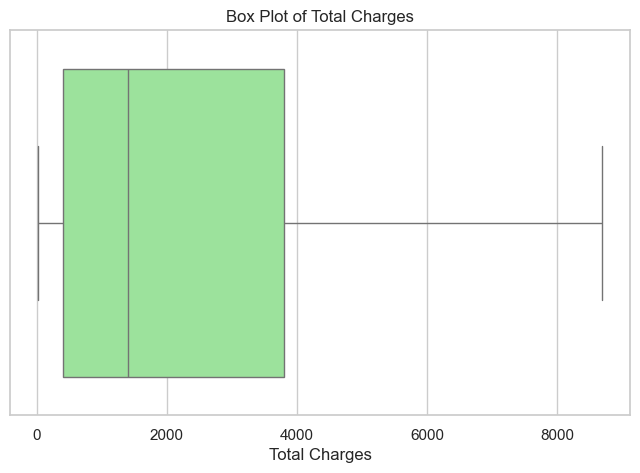

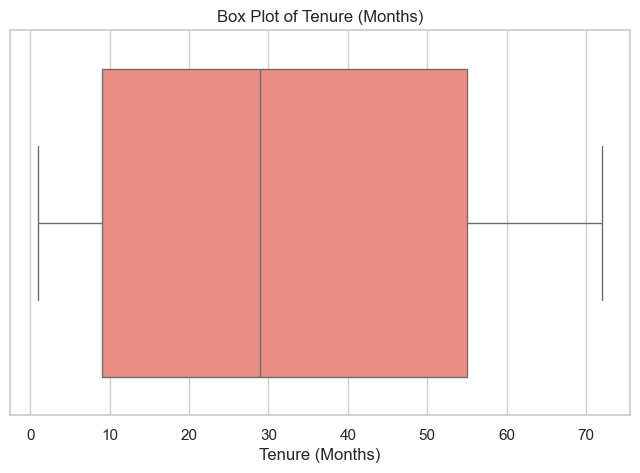

In [88]:
t1 = pd.read_csv("Telco_Customer_Churn_Data (1) (1) (2).csv")
t1['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
t1.dropna(subset=['TotalCharges'], inplace=True)

# Set Seaborn style
sns.set(style="whitegrid")

# Box plot for MonthlyCharges
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MonthlyCharges'], color='skyblue')
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()

# Box plot for TotalCharges
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalCharges'], color='lightgreen')
plt.title('Box Plot of Total Charges')
plt.xlabel('Total Charges')
plt.show()

# Box plot for tenure
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tenure'], color='salmon')
plt.title('Box Plot of Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.show()
